# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

## Import all the required libraries

In [1]:
import glob
from PIL import Image
from matplotlib.pyplot import imshow

#from matplotlib.pyplot import figure, imshow, axis

import os
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split

import tensorflow as tf 
#from tensorflow import keras 
from tensorflow.keras import layers,Model 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import plot_model 
#from tensorflow.keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings("ignore")

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [2]:
#Import the dataset and read the image into a seperate variable

images='data/Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [3]:
all_imgs[0]

'data/Images/2387197355_237f6f41ee.jpg'

In [4]:
#Import the dataset and read the text file into a seperate variable

captions_file = 'data/captions.txt'
def load_doc(filename):
    
    text_df = pd.read_csv(filename,sep=',')
    
    return text_df

captions_df = load_doc(captions_file)
display(captions_df.describe())
display(captions_df.head(2))

,image,caption
count,40455,40455
unique,8091,40201
top,1000268201_693b08cb0e.jpg,Two dogs playing in the snow .
freq,5,7


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .


In [5]:
### TEST

captions_df['caption'].str.split().str.len().max()

38

Captions:
12105    A girl is smiling at the camera with a crowd o...
12106    A girl with long dark hair wearing a yellow an...
12107                A young girl smiling for the camera .
12108     A young smiling girl wearing yellow in a crowd .
12109       Young girl posing with crowd in the background
Name: caption, dtype: object


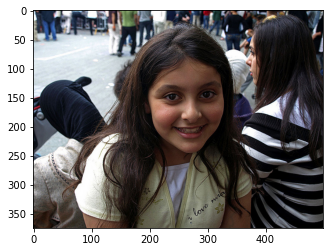

In [6]:
#Visualise both the images & text present in the dataset
image_path = all_imgs[1]
image_filename = os.path.basename(image_path)
im = Image.open(image_path)
imshow(im)

print(f'Captions:\n{captions_df[captions_df["image"]==image_filename]["caption"]}')

In [7]:
# #Import the dataset and read the text file into a seperate variable

# def load_doc(filename):
    
#     #your code here
    
#     return text

# doc = load_doc(text_file)
# print(doc[:300])

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [8]:
filepaths_df = pd.DataFrame({'filename' : [os.path.basename(image_path) for image_path in all_imgs],
              'path' : all_imgs })
df = pd.merge(filepaths_df,captions_df,left_on='filename',right_on='image')
df.drop('image',axis=1, inplace=True)

print(f'Shape:{df.shape}')
df.head()

Shape:(40455, 3)


,filename,path,caption
0,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A group of people are partying at a masquerade...
1,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A lady in red and black grins at the camera at...
2,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A woman in a domino mask and severe hair is at...
3,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A woman in a red dress and black mask is on a ...
4,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A woman wears a red dress and a black mask whi...


In [9]:
# all_img_id= #store all the image id here
# all_img_vector= #store all the image path here
# annotations= #store all the captions here

# df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
# df

In [10]:
#Create a list which contains all the captions
annotations=list(df['caption'].unique())

#add the <start> & <end> token to all those captions as well --------------------> TODO

#Create a list which contains all the path to the images
all_img_path=list(df['path'].unique())

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40201
Total images present in the dataset: 8091


In [11]:
# #Create the vocabulary & the counter for the captions

# vocabulary= #write your code here

# val_count=Counter(vocabulary)
# val_count

In [12]:
#Visualise the top 30 occuring words in the captions


#write your code here

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [11]:
#### TEST
# testwords = test['caption'].cat(sep="--")
# testwords
test = df.head()
test['caption'] = test['caption'].str.replace(r'\?|\.|\'', ' ').str.lower()
list_of_words = ' '.join(test['caption']).split()
print(list_of_words)
print(list(set(list_of_words)))

# from collections import Counter
# counts = Counter(list_of_words)
# print(counts)

most_freq_words = [word for word,cnt in counts.most_common(10)]
print(most_freq_words)


# from nltk.tokenize import word_tokenize

# # Get the list of unique words to create the vocabulary
# # words = df.apply(lambda row: word_tokenize(row['caption']), axis=1)
# all_captions = df['caption'].str.replace(r'\?|\.|\'', ' ').str.lower()
# all_words = ' '.join(all_captions).split()
# vocab = list(set(all_words)) 
# print(f'all words length:{len(all_words)}')
# print(f'vocab length:{len(vocab)}')

# # Get the top 5000 frequently occuring words from this vocabulary
# VOCAB_LENGTH = 5000
# from collections import Counter
# vocab_count = Counter(all_words)
# most_freq_words = [word for word,cnt in vocab_count.most_common(VOCAB_LENGTH)]
# #print(len(most_freq_words))
# print(f'most frequently occuring words:{len(most_freq_words)}')

['a', 'group', 'of', 'people', 'are', 'partying', 'at', 'a', 'masquerade', 'party', 'a', 'lady', 'in', 'red', 'and', 'black', 'grins', 'at', 'the', 'camera', 'at', 'a', 'costume', 'party', 'a', 'woman', 'in', 'a', 'domino', 'mask', 'and', 'severe', 'hair', 'is', 'at', 'a', 'party', 'a', 'woman', 'in', 'a', 'red', 'dress', 'and', 'black', 'mask', 'is', 'on', 'a', 'crowded', 'dance', 'floor', 'a', 'woman', 'wears', 'a', 'red', 'dress', 'and', 'a', 'black', 'mask', 'while', 'people', 'dance', 'behind', 'her']
['mask', 'dance', 'are', 'woman', 'in', 'group', 'her', 'lady', 'masquerade', 'on', 'the', 'wears', 'a', 'and', 'grins', 'domino', 'floor', 'partying', 'costume', 'hair', 'is', 'people', 'party', 'camera', 'severe', 'behind', 'at', 'dress', 'while', 'black', 'red', 'of', 'crowded']


NameError: name 'counts' is not defined

In [12]:
# Find the maximum length of any caption in the dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [13]:
# create the tokenizer

# # Replace captions with UNK if word is not in the frequent words list
 
# Get the top 5000 frequently occuring words from this vocabulary
VOCAB_LENGTH = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_LENGTH,
                                                  oov_token="<UNK>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(df['caption'])    
    
# Add the <pad> tag to the vocabulary
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'


# Create the tokenized vectors
caption_seqs = tokenizer.texts_to_sequences(df['caption'])


# Pad all sequences to be the same length as the longest one
captions_vector = tf.keras.preprocessing.sequence.pad_sequences(caption_seqs, padding='post')


# # Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(caption_seqs)


print(f'Total no. of captions      = {len(caption_seqs)}')
print(f'Total no. of token words   = {len(tokenizer.word_index) + 1}')
print(f'Vocab length for tokenizer = {VOCAB_LENGTH}')
print(f'Maximum caption length     = {max_length}')

Total no. of captions      = 40455
Total no. of token words   = 8496
Vocab length for tokenizer = 5000
Maximum caption length     = 37


In [16]:
# Create word-to-index and index-to-word mappings.
# Add index to each word and create the captions column with index values 

#your code here

In [17]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
freq = nltk.FreqDist(only_nn)

from collections import Counter
vocab_count = Counter(all_words)

vocab_count.most_common(30)

common_words = [{"word":word, "frequency":cnt} for word,cnt in vocab_count.most_common(30)]
common_words_df = pd.DataFrame(common_words)
display(common_words_df.head())

NameError: name 'nltk' is not defined

NameError: name 'common_words_df' is not defined

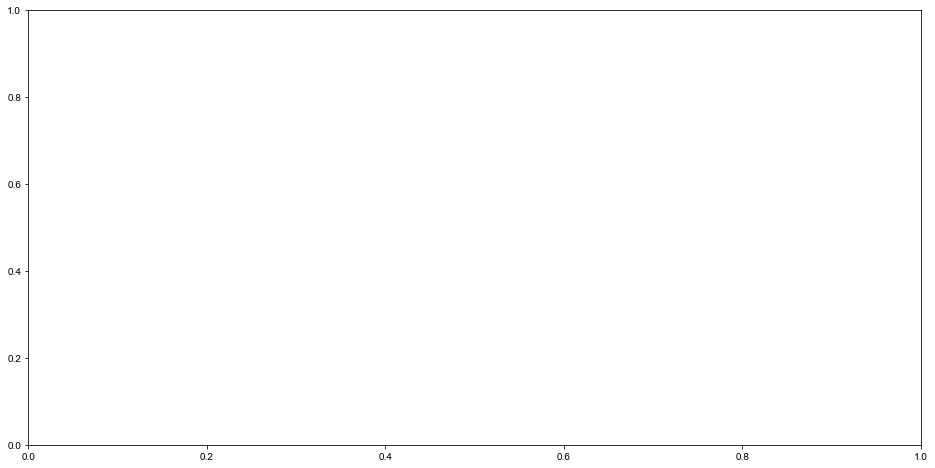

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))
sns.set_theme(style="darkgrid")
sns.barplot(x="word", y = 'frequency', data = common_words_df)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequently Occuring Words") # You can comment this line out if you don't need title
plt.show()

In [19]:
df.head()

,filename,path,caption
0,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,a group of people are partying at a masquerade...
1,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,a lady in red and black grins at the camera at...
2,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,a woman in a domino mask and severe hair is at...
3,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,a woman in a red dress and black mask is on a ...
4,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,a woman wears a red dress and a black mask whi...


In [20]:
# max_caption_length = df['caption'].str.split().str.len().max()

# print(f'Maximum caption length = {max_caption_length}')

In [ ]:
# # Pad each vector to the max_length of the captions ^ store it to a variable

# cap_vector= #your code here

# print("The shape of Caption vector is :" + str(cap_vector.shape))

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [32]:
df.head()

,filename,path,caption
0,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A group of people are partying at a masquerade...
1,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A lady in red and black grins at the camera at...
2,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A woman in a domino mask and severe hair is at...
3,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A woman in a red dress and black mask is on a ...
4,2387197355_237f6f41ee.jpg,data/Images/2387197355_237f6f41ee.jpg,A woman wears a red dress and a black mask whi...


In [ ]:
#write your code here to create the dataset consisting of image paths

In [13]:
#write your code here for creating the function. This function should return images & their path
 

def load_image(image_path):
    #write your pre-processing steps here
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    # Preprocess the images using the preprocess_input method to normalize the image so that it 
    # contains pixels in the range of -1 to 1, which matches the format of the images used to train InceptionV3.
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [14]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path

# Get unique image paths
img_paths = sorted(df['path'].unique())

# Set batch size
BATCH_SIZE=16

image_dataset = tf.data.Dataset.from_tensor_slices(img_paths)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE)
    



## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [15]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input
hidden_layer = image_model.layers[-1].output

#build the final model using both input & output layer
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)


In [17]:
# # Get unique images
# encode_train = sorted(df['path'].unique())

# # Set batch size
# BATCH_SIZE=16

# print("Read the image data using tf data")
# # Load the images
# image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
# image_dataset = image_dataset.map(
#   load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE)

# print("After reading image data using tf data")

# for img, path in image_dataset:
#     batch_features = image_features_extract_model(img)
#     batch_features = tf.reshape(batch_features,
#                               (batch_features.shape[0], -1, batch_features.shape[3]))

# print("After extracting features for each image.")
# for bf, p in zip(batch_features, path):
#     path_of_feature = p.numpy().decode("utf-8")
#     np.save(path_of_feature, bf.numpy())
    
# print("Done")

In [48]:
# write the code to apply the feature_extraction model to your earlier created dataset 
# which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape 
# is in order of (batch_size, 8*8, 2048)


# import tensorflow.compat.v1.keras.backend as K
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

#feature_dict = {}
#featlist = []
#print(image_dataset)
for imgs,paths in image_dataset:
    batch_features = image_features_extract_model(imgs)
    batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))
    
    for bf, p in zip(batch_features, paths):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())
        
#     for batch_feature, path in zip(batch_features, paths):
#         img_path = path.numpy().decode("utf-8")
#         feature_dict[img_path] = batch_feature.numpy()
        

### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation - Train/Test split
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [49]:
path_train, path_test, cap_train, cap_test = train_test_split(
                                                    #df[['filename','path']],
                                                    df[['path']],
                                                    df['caption'],
                                                    test_size = 0.2, 
                                                    random_state = 42)




In [50]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [64]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name[0].numpy().decode('utf-8')+'.npy')
  return img_tensor, cap

In [68]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BUFFER_SIZE = 1000

def gen_dataset(img_path,cap_data):
    img_dataset = tf.data.Dataset.from_tensor_slices((img_path,cap_data))
#    img_dataset = img_dataset.map(map_func)
    
    img_dataset = img_dataset.map(lambda item1, item2: tf.py_function(
          map_func, [item1, item2], [tf.float32, tf.string]),
          num_parallel_calls=tf.data.AUTOTUNE)
    # your code goes here to create the dataset & transform it
    
    # Shuffle and batch
    img_dataset = img_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    img_dataset = img_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return img_dataset,cap_data



In [69]:
train_dataset,path_series=gen_dataset(path_train,cap_train)
test_dataset,path_seriestst=gen_dataset(path_test,cap_test)

In [70]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
#sample_img_batch, sample_cap_batch = train_dataset.get_next()
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(16, 64, 2048)
(16,)


In [157]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(img_path,cap_data):
    
#     from tensorflow.python.util import compat
#     print(f"cmpt:{compat.as_text(img_path)}")
    
    #print(f"img_path:{img_path}")
#     st_value = ''.join ([chr(char) for char in tf.strings.unicode_decode(img_path,
#                       input_encoding='UTF-8').numpy()])

    
    #print(f"st_value:{st_value}")
    
    #print(f"here1.1 - {img_path}")
    #print(f"here1.10 - {type(img_path)}")
    
    #print(f"here1.105 - {tf.strings.unicode_decode(img_path, input_encoding='UTF-8')}")
    #print(f"here1.13 - {img_path.numpy()}")
    newpath = img_path[0].numpy().decode("utf-8")
    print(f"here1.14 - {newpath}")
    #print(f"here1.11 - {bytes.decode(img_path.numpy())}")
    #print(f"here1.12 - {bytes.decode(img_path.numpy())}")
    #img_tensor = feature_dict[img_path.decode('utf-8')]
    img_tensor = feature_dict[newpath]
    print("here1.2")
    return img_tensor,cap_data



In [158]:
# # Load the numpy files
# def map_func(img_name, cap):
#   img_tensor = np.load(img_name.decode('utf-8')+'.npy')
#   return img_tensor, cap

In [159]:


# dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# # Use map to load the numpy files in parallel
# dataset = dataset.map(lambda item1, item2: tf.numpy_function(
#           map_func, [item1, item2], [tf.float32, tf.int32]),
#           num_parallel_calls=tf.data.AUTOTUNE)

# # Shuffle and batch
# dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [160]:

BUFFER_SIZE = 1000

In [179]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier



def gen_dataset(img_path,cap_data):
    
    # your code goes here to create the dataset & transform it
    print("here1")
    img_dataset = tf.data.Dataset.from_tensor_slices((img_path,cap_data))
    print(f"here2-{len(img_path)}")
    print(f"here2-{img_path}")
#     img_dataset = img_dataset.map(lambda item1, item2: tf.numpy_function(
#           map_func, [item1, item2], [tf.float32, tf.int32]),
#           num_parallel_calls=tf.data.AUTOTUNE)
    #img_dataset = img_dataset.map(map_func)
    


#     img_dataset  = img_dataset.map(lambda x,y: tf.py_function(func=map_func,
#       inp=[x,y], Tout=[tf.string,tf.string]))  # ==> [ "HELLO", "WORLD" ] 
    path_series = img_dataset.map(map_func)
    
    # Shuffle and batch
    img_dataset = img_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    img_dataset = img_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    print("here3")
    return img_dataset,cap_data,path_series



In [192]:
print(f"{feature_dict.keys()}")

dict_keys(['data/Images/1000268201_693b08cb0e.jpg', 'data/Images/1001773457_577c3a7d70.jpg', 'data/Images/1002674143_1b742ab4b8.jpg', 'data/Images/1003163366_44323f5815.jpg', 'data/Images/1007129816_e794419615.jpg', 'data/Images/1007320043_627395c3d8.jpg', 'data/Images/1009434119_febe49276a.jpg', 'data/Images/1012212859_01547e3f17.jpg', 'data/Images/1015118661_980735411b.jpg', 'data/Images/1015584366_dfcec3c85a.jpg', 'data/Images/101654506_8eb26cfb60.jpg', 'data/Images/101669240_b2d3e7f17b.jpg', 'data/Images/1016887272_03199f49c4.jpg', 'data/Images/1019077836_6fc9b15408.jpg', 'data/Images/1019604187_d087bf9a5f.jpg', 'data/Images/1020651753_06077ec457.jpg', 'data/Images/1022454332_6af2c1449a.jpg', 'data/Images/1022454428_b6b660a67b.jpg', 'data/Images/1022975728_75515238d8.jpg', 'data/Images/102351840_323e3de834.jpg', 'data/Images/1024138940_f1fefbdce1.jpg', 'data/Images/102455176_5f8ead62d5.jpg', 'data/Images/1026685415_0431cbf574.jpg', 'data/Images/1028205764_7e8df9a2ea.jpg', 'data/Ima

In [193]:
print(f"{feature_dict['data/Images/1002674143_1b742ab4b8.jpg']}")

[[0.         0.         0.         ... 1.3794637  0.23044167 0.        ]
 [0.         0.         0.         ... 0.8410655  0.10408571 0.        ]
 [0.00464068 0.         0.         ... 0.         0.08157934 0.        ]
 ...
 [0.         0.         0.         ... 1.0989262  0.         0.        ]
 [0.         0.         0.21061084 ... 1.2415959  0.25440934 0.        ]
 [0.         0.         0.         ... 1.403106   0.9622633  0.        ]]


In [194]:
print(f"{feature_dict['data/Images/1001773457_577c3a7d70.jpg']}")


[[0.         0.6636766  0.46285674 ... 0.         0.         3.3322697 ]
 [0.         1.2268119  0.         ... 0.         0.2539008  3.329539  ]
 [1.2881907  1.5195452  0.         ... 0.46777943 0.3647458  3.8172677 ]
 ...
 [0.33720064 2.87754    0.         ... 0.         1.0885202  0.        ]
 [0.20815182 1.0364996  0.         ... 0.         0.5746542  0.        ]
 [0.         0.54549706 0.         ... 0.         0.27576682 0.        ]]


In [46]:
#### FOR TESTING - ONE CELL

def map_func1(img_path,cap_data):
    
    #print(f"img_path:{img_path}")
    #print(f"here1.11 - {type(img_path)}")
    print(f"here1.11")
    newpath = img_path[0].numpy().decode("utf-8")
    print(f"here1.14 - {newpath}")
    img_tensor = feature_dict[newpath]
    print("here1.2")
    return img_tensor,cap_data

print(f"here1")
img_dataset = tf.data.Dataset.from_tensor_slices((path_train,cap_train))
print(f"here2:{len(img_dataset)}")
#path_series = img_dataset.map(map_func)
# img_dataset  = img_dataset.map(lambda x,y: tf.py_function(func=map_func1,
#        inp=[x,y], Tout=[tf.string,tf.string]))  # ==> [ "HELLO", "WORLD" ] 

def mapfunctest(path,caption):
    print(f"here1.1 - {path},{caption}")
    print(f"here1.2 - {path[0]},{caption}")
    newpath = path[0].numpy().decode("utf-8")
    print(f"here1.3 - {newpath},{caption}")
    print(f"here1.4 - {feature_dict[newpath]},{caption}")
    path_tensor = feature_dict[newpath]
    return path_tensor, caption

img_dataset  = img_dataset.map(lambda x,y: tf.py_function(func=mapfunctest,
       inp=[x,y], Tout=[tf.string,tf.string]))  # ==> [ "HELLO", "WORLD" ] 
                                                          
print(f"here3:{len(img_dataset)}")

#train_dataset =gen_dataset(path_train,cap_train)
print(f"here4")

#sample_img_batch, sample_cap_batch = next(iter(img_dataset))
pathsiter,capsiter = next(iter(img_dataset))
print(f"here5-pathsiter:{type(pathsiter)}, {pathsiter}")
print(f"here5-capsiter:{type(capsiter)}, {capsiter}")


# print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
# print(sample_cap_batch.shape) #(batch_size,max_len)


here1
here2:32364
here3:32364
here4
here1.1 - [b'data/Images/2602083686_e8a1af69cf.jpg'],b'Two nude women painted black and white are riding bicycles on the road .'
here1.2 - b'data/Images/2602083686_e8a1af69cf.jpg',b'Two nude women painted black and white are riding bicycles on the road .'
here1.3 - data/Images/2602083686_e8a1af69cf.jpg,b'Two nude women painted black and white are riding bicycles on the road .'
here1.4 - [[0.         0.24606943 0.         ... 0.         0.         0.71142554]
 [0.         0.7573277  0.         ... 0.         0.10463718 0.27462664]
 [0.         0.34217343 0.         ... 0.5855693  0.33902785 0.26799557]
 ...
 [0.         0.22641519 0.3129113  ... 1.230545   1.5868697  0.        ]
 [0.         0.75608265 0.         ... 0.66148937 1.8729942  0.        ]
 [0.         0.6157085  0.         ... 0.17024016 1.6999166  0.        ]],b'Two nude women painted black and white are riding bicycles on the road .'


2021-12-02 12:38:52.427836: W tensorflow/core/framework/op_kernel.cc:1763] Invalid argument: ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
Traceback (most recent call last):

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 144, in __call__
    outputs = [

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 145, in <listcomp>
    _maybe_copy_to_context_device(self._convert(x, dtype=dtype),

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 124, in _convert
    return ops.convert_to_tensor(value, dtype=dtype)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8

InvalidArgumentError: ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
Traceback (most recent call last):

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 144, in __call__
    outputs = [

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 145, in <listcomp>
    _maybe_copy_to_context_device(self._convert(x, dtype=dtype),

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 124, in _convert
    return ops.convert_to_tensor(value, dtype=dtype)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/profiler/trace.py", line 163, in wrapped
    return func(*args, **kwargs)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 1540, in convert_to_tensor
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/tensor_conversion_registry.py", line 52, in _default_conversion_function
    return constant_op.constant(value, dtype, name=name)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 264, in constant
    return _constant_impl(value, dtype, shape, name, verify_shape=False,

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 276, in _constant_impl
    return _constant_eager_impl(ctx, value, dtype, shape, verify_shape)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 301, in _constant_eager_impl
    t = convert_to_eager_tensor(value, ctx, dtype)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 98, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).


	 [[{{node EagerPyFunc}}]]

In [181]:
train_dataset,path_series=gen_dataset(path_train,cap_train)
test_dataset,path_seriestst=gen_dataset(path_test,cap_test)

here1
here2-32364
here2-                                        path
32121  data/Images/2602083686_e8a1af69cf.jpg
9831   data/Images/2430860418_fd0726f414.jpg
33128  data/Images/2600170955_bf30c5d5c0.jpg
6199   data/Images/2928152792_b16c73434a.jpg
19661  data/Images/2295894587_2fd8faf550.jpg
...                                      ...
6265   data/Images/3538527033_df13112d51.jpg
11284   data/Images/534875358_6ea30d3091.jpg
38158  data/Images/3069282021_e05e1829f3.jpg
860     data/Images/410413536_11f1127c46.jpg
15795  data/Images/1469358746_2a879abaf3.jpg

[32364 rows x 1 columns]


KeyError: <TensorSliceDataset shapes: ((1,), ()), types: (tf.string, tf.string)>

In [168]:
next(iter(train_dataset))

<PrefetchDataset shapes: (<unknown>, <unknown>, <unknown>), types: (tf.string, tf.string, tf.string)>

In [169]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
#sample_img_batch, sample_cap_batch = train_dataset.get_next()
#print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
#print(sample_cap_batch.shape) #(batch_size,max_len)

here1.14 - data/Images/2602083686_e8a1af69cf.jpg
here1.2
here1.14 - data/Images/2430860418_fd0726f414.jpg
here1.2


2021-12-02 11:49:13.569161: W tensorflow/core/framework/op_kernel.cc:1763] Invalid argument: ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
Traceback (most recent call last):

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 144, in __call__
    outputs = [

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 145, in <listcomp>
    _maybe_copy_to_context_device(self._convert(x, dtype=dtype),

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 124, in _convert
    return ops.convert_to_tensor(value, dtype=dtype)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8

InvalidArgumentError: ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
Traceback (most recent call last):

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 144, in __call__
    outputs = [

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 145, in <listcomp>
    _maybe_copy_to_context_device(self._convert(x, dtype=dtype),

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 124, in _convert
    return ops.convert_to_tensor(value, dtype=dtype)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/profiler/trace.py", line 163, in wrapped
    return func(*args, **kwargs)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 1540, in convert_to_tensor
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/tensor_conversion_registry.py", line 52, in _default_conversion_function
    return constant_op.constant(value, dtype, name=name)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 264, in constant
    return _constant_impl(value, dtype, shape, name, verify_shape=False,

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 276, in _constant_impl
    return _constant_eager_impl(ctx, value, dtype, shape, verify_shape)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 301, in _constant_eager_impl
    t = convert_to_eager_tensor(value, ctx, dtype)

  File "/Users/lakshmi/miniforge3/envs/capstone/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py", line 98, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).


	 [[{{node EagerPyFunc}}]]

## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [165]:
# # Feel free to change these parameters according to your system's configuration

# BATCH_SIZE = 64
# BUFFER_SIZE = 1000
# embedding_dim = 256
# units = 512
# vocab_size = top_k + 1
# num_steps = len(img_name_train) // BATCH_SIZE
# # Shape of the vector extracted from InceptionV3 is (64, 2048)
# # These two variables represent that vector shape
# features_shape = 2048
# attention_features_shape = 64

In [ ]:
embedding_dim = 256 
units = 512
vocab_size = VOCAB_LENGTH + 1 #top 5,000 words +1
train_num_steps = =#len(total train images) // BATCH_SIZE
test_num_steps = #len(total test images) // BATCH_SIZE

### Encoder

In [ ]:
class Encoder(Model):
    # Pass the features extracted from V3 inception through a fully connected dense layer  
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim)#build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features)
        features = tf.nn.relu(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        
        return features
    
   

In [ ]:
encoder=Encoder(embedding_dim)

### Attention model

In [ ]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units)#build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = self.V(tf.nn.tanh(self.W1[features] + self.W2[hidden]))# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = # reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [ ]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = #iniitalise your Attention model with units
        self.embed = #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = #build your Dense layer
        self.d2 = #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = #create your context vector & attention weights from attention model
        embed =  # embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [ ]:
optimizer = #define the optimizer
loss_object = #define your loss object

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "your checkpoint path"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path_ckpt, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.reset_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        
    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
        
    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    
    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

In [ ]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [ ]:
def beam_evaluate(image, beam_index = #your value for beam index):

    #write your code to evaluate the result using beam search
                  
    return final_caption



In [ ]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
rid = np.random.randint(0, len(img_test))
test_image = img_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=#set your weights)
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [ ]:
captions=beam_evaluate(test_image)
print(captions)